# Beer Recipes

## Parte 1.- Estadisticos de Clasificación mas Relevantes

In [126]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

In [127]:
beers = pd.read_csv('../Beer Recipe/recipeData_test.csv', index_col=0)
beers.head()

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,SugarScale,BrewMethod
BeerID,,,,,,,,,,,,,,,,
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,Specific Gravity,All Grain
2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,Specific Gravity,All Grain
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,1.350,70.0,Specific Gravity,extract
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,1.350,70.0,Specific Gravity,All Grain
5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,Specific Gravity,All Grain


#### Del dataset anterior vamos a revisar los estilos de cerveza mas populares

In [128]:
beers['Style'].value_counts()

American IPA              11940
American Pale Ale          7581
Saison                     2617
American Light Lager       2277
American Amber Ale         2038
                          ...  
Lichtenhainer                 6
Apple Wine                    6
Pyment (Grape Melomel)        5
Traditional Perry             2
French Cider                  2
Name: Style, Length: 175, dtype: int64

#### A continuación solo vamos a graficar los primeros 5 estilos de Cervezas y sus métodos de preparación

In [129]:
T1 = beers[(beers['Style'] == 'American IPA') | (beers['Style'] == 'American Pale Ale') | (beers['Style'] == 'Saison') | (beers['Style'] == 'American Light Lager') | (beers['Style'] == 'American Amber Ale')]
T1.head()

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,SugarScale,BrewMethod
BeerID,,,,,,,,,,,,,,,,
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,1.350,70.0,Specific Gravity,extract
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,1.350,70.0,Specific Gravity,All Grain
6,Sierra Nevada Pale Ale Clone,/homebrew/recipe/view/28546/sierra-nevada-pale...,American Pale Ale,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,Specific Gravity,All Grain
11,Bakke Brygg HveteIPA 25 L,/homebrew/recipe/view/73890/bakke-brygg-hvetei...,American IPA,7,25.00,1.064,1.014,6.63,64.26,7.78,29.00,90,1.055,74.0,Specific Gravity,All Grain
12,Hop Notch Clone,/homebrew/recipe/view/10092/hop-notch-clone,American IPA,7,15.14,1.066,1.015,6.62,111.00,14.26,11.36,90,1.350,70.0,Specific Gravity,BIAB


In [130]:
T1["Size(L)"].max()

6102.08

In [131]:
size_Max = T1["Size(L)"] == 6102.08
T1[size_Max]

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,SugarScale,BrewMethod
BeerID,,,,,,,,,,,,,,,,
58089,Pale Ale - 50 Barrel,/homebrew/recipe/view/516730/pale-ale-50-barrel,American Pale Ale,10,6102.08,1.056,1.013,5.6,20.14,3.49,6454.13,60,1.053,90.0,Specific Gravity,All Grain


In [132]:
crosstab = pd.crosstab(T1['BrewMethod'], T1['Style'])
crosstab

Style,American Amber Ale,American IPA,American Light Lager,American Pale Ale,Saison
BrewMethod,,,,,
All Grain,1322,7983,1500,4932,1821
BIAB,285,1931,338,1395,477
Partial Mash,104,531,94,348,112
extract,327,1495,345,906,207


In [243]:
method = T1["BrewMethod"].value_counts()
method

All Grain       17558
BIAB             4426
extract          3280
Partial Mash     1189
Name: BrewMethod, dtype: int64

In [246]:
metP = method * 100 / method.sum()

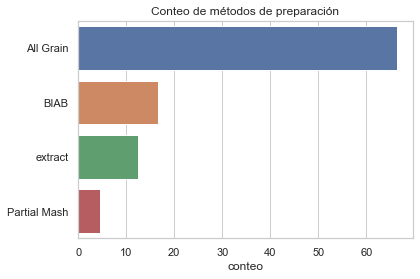

In [247]:
ax = sns.barplot(x=metP, y=metP.index, orient='h')
ax.set_title('Conteo de métodos de preparación')
ax.set(xlabel='conteo');

In [133]:
counts = T1["Style"].value_counts()
counts

American IPA            11940
American Pale Ale        7581
Saison                   2617
American Light Lager     2277
American Amber Ale       2038
Name: Style, dtype: int64

In [134]:
counts * 100 / counts.sum()

American IPA            45.136657
American Pale Ale       28.658375
Saison                   9.893018
American Light Lager     8.607719
American Amber Ale       7.704230
Name: Style, dtype: float64

In [135]:
as_percentages = counts * 100 / counts.sum()

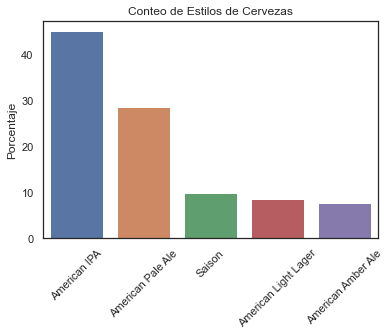

In [136]:
ax = sns.barplot(x=as_percentages.index, y=as_percentages)
ax.set_title('Conteo de Estilos de Cervezas')
ax.set(ylabel='Porcentaje');
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

## Grados de Alcohol

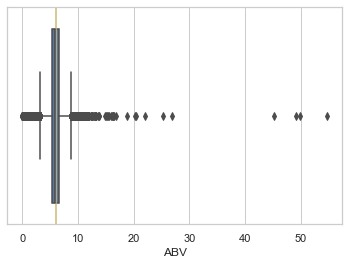

In [137]:
sns.set_style("whitegrid")
sns.boxplot(x=T1['ABV']);
plt.axvline(T1['ABV'].mean(), c='y');

In [138]:
print(f'Valor mínimo: {T1["ABV"].min()}')
print(f'Percentil 0: {T1["ABV"].quantile(0)}')
print(f'Percentil 10: {T1["ABV"].quantile(0.1)}')
print(f'Percentil 25: {T1["ABV"].quantile(0.25)}')
print(f'Promedio: {T1["ABV"].median()}')
print(f'Mediana: {T1["ABV"].quantile(0.5)}')
print(f'Percentil 75: {T1["ABV"].quantile(0.75)}')
print(f'Percentil 90: {T1["ABV"].quantile(0.9)}')
print(f'Percentil 100: {T1["ABV"].quantile(1)}')
print(f'Valor máximo: {T1["ABV"].max()}')

Valor mínimo: 0.0
Percentil 0: 0.0
Percentil 10: 4.72
Percentil 25: 5.28
Promedio: 5.94
Mediana: 5.94
Percentil 75: 6.65
Percentil 90: 7.309999999999999
Percentil 100: 54.72
Valor máximo: 54.72


### Rango Intercuantilico

In [139]:
iqr = T1['ABV'].quantile(0.75) - T1['ABV'].quantile(0.25)
filtro_inferior = T1['ABV'] > T1['ABV'].quantile(0.25) - (iqr * 1.5)
filtro_superior = T1['ABV'] < T1['ABV'].quantile(0.75) + (iqr * 1.5)

abv_filtrado = T1[filtro_inferior & filtro_superior]

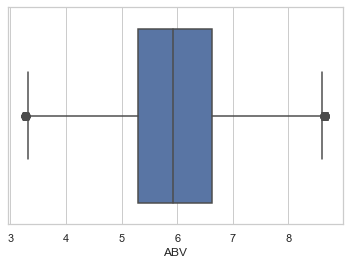

In [140]:
sns.boxplot(x=abv_filtrado['ABV']);

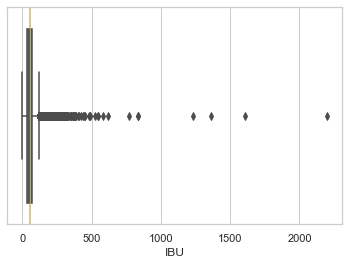

In [141]:
sns.set_style("whitegrid")
sns.boxplot(x=T1['IBU']);
plt.axvline(T1['IBU'].mean(), c='y');

In [142]:
print(f'Valor mínimo: {T1["IBU"].min()}')
print(f'Percentil 0: {T1["IBU"].quantile(0)}')
print(f'Percentil 10: {T1["IBU"].quantile(0.1)}')
print(f'Percentil 25: {T1["IBU"].quantile(0.25)}')
print(f'Promedio: {T1["IBU"].median()}')
print(f'Mediana: {T1["IBU"].quantile(0.5)}')
print(f'Percentil 75: {T1["IBU"].quantile(0.75)}')
print(f'Percentil 90: {T1["IBU"].quantile(0.9)}')
print(f'Percentil 100: {T1["IBU"].quantile(1)}')
print(f'Valor máximo: {T1["IBU"].max()}')

Valor mínimo: 0.0
Percentil 0: 0.0
Percentil 10: 20.68
Percentil 25: 32.54
Promedio: 46.42
Mediana: 46.42
Percentil 75: 66.89
Percentil 90: 90.58399999999997
Percentil 100: 2197.07
Valor máximo: 2197.07


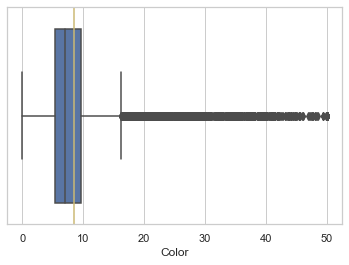

In [143]:
sns.set_style("whitegrid")
sns.boxplot(x=T1['Color']);
plt.axvline(T1['Color'].mean(), c='y');

In [144]:
print(f'Valor mínimo: {T1["Color"].min()}')
print(f'Percentil 0: {T1["Color"].quantile(0)}')
print(f'Percentil 10: {T1["Color"].quantile(0.1)}')
print(f'Percentil 25: {T1["Color"].quantile(0.25)}')
print(f'Promedio: {T1["Color"].median()}')
print(f'Mediana: {T1["Color"].quantile(0.5)}')
print(f'Percentil 75: {T1["Color"].quantile(0.75)}')
print(f'Percentil 90: {T1["Color"].quantile(0.9)}')
print(f'Percentil 100: {T1["Color"].quantile(1)}')
print(f'Valor máximo: {T1["Color"].max()}')

Valor mínimo: 0.0
Percentil 0: 0.0
Percentil 10: 4.09
Percentil 25: 5.31
Promedio: 7.01
Mediana: 7.01
Percentil 75: 9.69
Percentil 90: 13.7
Percentil 100: 50.0
Valor máximo: 50.0


In [145]:
pred=dict(zip(T1.StyleID.unique(),T1.Style.unique()))
print(pred)

{7: 'American IPA', 10: 'American Pale Ale', 134: 'Saison', 4: 'American Amber Ale', 9: 'American Light Lager'}


In [146]:
print(T1["Style"].value_counts())

American IPA            11940
American Pale Ale        7581
Saison                   2617
American Light Lager     2277
American Amber Ale       2038
Name: Style, dtype: int64


## Matriz de Correlación

In [171]:
beers_filtered = beers.drop(columns=['Name','URL','Style','StyleID','SugarScale','BrewMethod'])

In [172]:
beers_filtered.corr()

,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency
Size(L),1.000000,0.161092,0.143493,-0.013559,-0.031297,-0.018027,0.994130,0.044319,0.175211,0.109147
OG,0.161092,1.000000,0.947101,0.030531,-0.001688,0.013867,0.163952,0.032138,0.962457,0.067906
FG,0.143493,0.947101,1.000000,0.030034,-0.000198,0.031220,0.144821,0.032104,0.912729,0.062034
ABV,-0.013559,0.030531,0.030034,1.000000,0.282502,0.270414,-0.009858,0.120464,0.026138,0.048193
IBU,-0.031297,-0.001688,-0.000198,0.282502,1.000000,0.062148,-0.029663,0.079896,-0.006899,-0.032648
Color,-0.018027,0.013867,0.031220,0.270414,0.062148,1.000000,-0.016752,0.057795,0.013287,-0.017765
BoilSize,0.994130,0.163952,0.144821,-0.009858,-0.029663,-0.016752,1.000000,0.050637,0.175031,0.122405
BoilTime,0.044319,0.032138,0.032104,0.120464,0.079896,0.057795,0.050637,1.000000,0.027023,0.161862
BoilGravity,0.175211,0.962457,0.912729,0.026138,-0.006899,0.013287,0.175031,0.027023,1.000000,0.058386
Efficiency,0.109147,0.067906,0.062034,0.048193,-0.032648,-0.017765,0.122405,0.161862,0.058386,1.000000


In [147]:
T1_filtered = T1.drop(columns=['Name','URL','Style','StyleID','SugarScale','BrewMethod'])

In [148]:
T1_filtered.corr()

,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency
Size(L),1.000000,0.202692,0.193893,-0.010173,-0.043562,-0.013346,0.995927,0.059370,0.224569,0.118369
OG,0.202692,1.000000,0.958512,0.019562,-0.011740,-0.006817,0.202898,0.030023,0.974247,0.064450
FG,0.193893,0.958512,1.000000,0.019544,-0.009336,-0.002757,0.193687,0.029012,0.932200,0.061340
ABV,-0.010173,0.019562,0.019544,1.000000,0.229750,0.183510,-0.007774,0.079379,0.015627,0.095326
IBU,-0.043562,-0.011740,-0.009336,0.229750,1.000000,0.038525,-0.043002,0.060094,-0.016788,-0.039238
Color,-0.013346,-0.006817,-0.002757,0.183510,0.038525,1.000000,-0.013541,0.018116,-0.007731,-0.050757
BoilSize,0.995927,0.202898,0.193687,-0.007774,-0.043002,-0.013541,1.000000,0.065787,0.222424,0.132632
BoilTime,0.059370,0.030023,0.029012,0.079379,0.060094,0.018116,0.065787,1.000000,0.029209,0.159229
BoilGravity,0.224569,0.974247,0.932200,0.015627,-0.016788,-0.007731,0.222424,0.029209,1.000000,0.058715
Efficiency,0.118369,0.064450,0.061340,0.095326,-0.039238,-0.050757,0.132632,0.159229,0.058715,1.000000


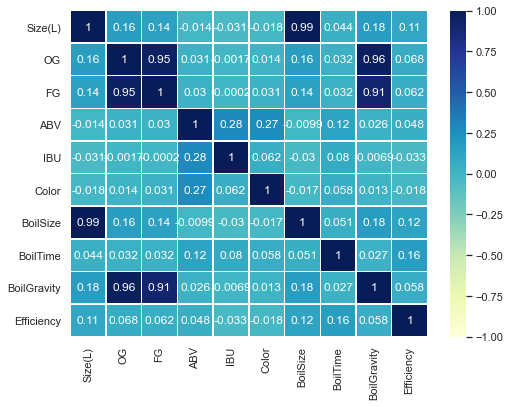

In [173]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(beers_filtered.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

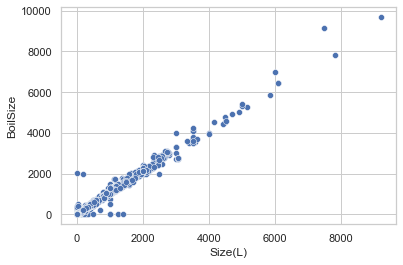

In [174]:
sns.scatterplot(x=beers['Size(L)'], y=beers['BoilSize']);

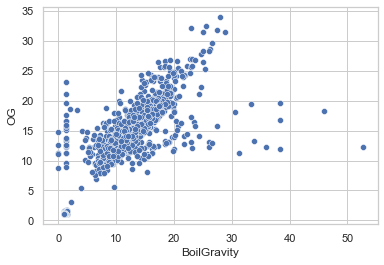

In [192]:
sns.scatterplot(x=beers['BoilGravity'], y=beers['OG']);

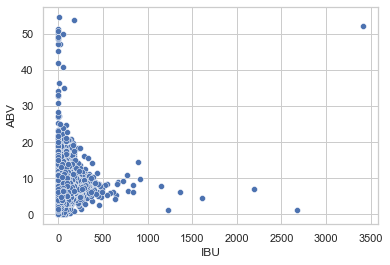

In [248]:
sns.scatterplot(x=beers['IBU'], y=beers['ABV']);

## Regresión lineal simple

### BoilGravity vs OG

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [193]:
lr = LinearRegression()
bg = beers['BoilGravity']
og = beers['OG']
# Usamos `to_frame` para convertir nuestra Serie en una estructura de 2 dimensiones, como lo requiere el modelo
lr.fit(bg.to_frame(), og)

LinearRegression()

In [194]:
y_predict = lr.predict(bg.to_frame())

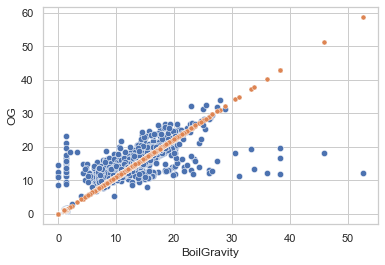

In [195]:
sns.scatterplot(x=bg, y=og, s=40);
sns.scatterplot(x=bg, y=y_predict, s=25);

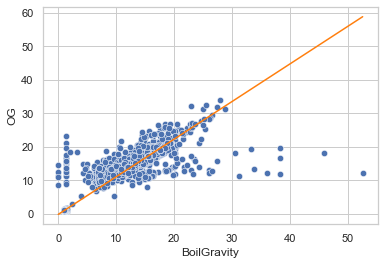

In [196]:
sns.scatterplot(x=bg, y=og, s=40);
sns.lineplot(x=bg, y=y_predict, color='#FF7F0E');

In [197]:
intercept = lr.intercept_
coefficient = lr.coef_[0]

In [198]:
print(f'y = {coefficient} * x + {intercept}')

y = 1.1195206078374065 * x + -0.10787330269927087


In [199]:
bg

BeerID
1        1.038
2        1.070
3        1.350
4        1.350
5        1.050
         ...  
73856    1.098
73857    1.060
73858    1.034
73860    1.043
73861    1.056
Name: BoilGravity, Length: 73264, dtype: float64

In [200]:
og

BeerID
1        1.055
2        1.083
3        1.063
4        1.061
5        1.060
         ...  
73856    1.065
73857    1.052
73858    1.059
73860    1.051
73861    1.060
Name: OG, Length: 73264, dtype: float64

In [203]:
print(f'Valor de x: {bg[3]}')
print(f'Valor predecido por nuestro modelo: {y_predict[3]}')
print(f'Valor cuantificado directamente usando la funcion: {coefficient * og[3] + intercept}')

Valor de x: 1.35
Valor predecido por nuestro modelo: 1.403479517881228
Valor cuantificado directamente usando la funcion: 1.082177103431892


In [204]:
print(f'Valor de x: {bg[4]}')
print(f'Valor predecido por nuestro modelo: {y_predict[4]}')
print(f'Valor cuantificado directamente usando la funcion: {coefficient * bg[4] + intercept}')

Valor de x: 1.35
Valor predecido por nuestro modelo: 1.067623335530006
Valor cuantificado directamente usando la funcion: 1.403479517881228


In [206]:
print(f'Valor de x: {bg[6]}')
print(f'Valor predecido por nuestro modelo: {y_predict[6]}')
print(f'Valor cuantificado directamente usando la funcion: {coefficient * bg[6] + intercept}')

Valor de x: 1.047
Valor predecido por nuestro modelo: 1.403479517881228
Valor cuantificado directamente usando la funcion: 1.0642647737064936


In [207]:
print(f'Valor de x: {bg[58089]}')
print(f'Valor predecido por nuestro modelo: {y_predict[58089]}')
print(f'Valor cuantificado directamente usando la funcion: {coefficient * bg[58089] + intercept}')

Valor de x: 1.053
Valor predecido por nuestro modelo: 1.0441134027654202
Valor cuantificado directamente usando la funcion: 1.0709818973535181


In [208]:
print(f'R2: {np.power(bg.corr(og), 2)}')

R2: 0.9263236315755409


In [209]:
print(f'R2: {lr.score(bg.to_frame(), og)}')

R2: 0.9263236315755404


### IBU vs ABV

In [249]:
ibu = beers['IBU']
abv = beers['ABV']
# Usamos `to_frame` para convertir nuestra Serie en una estructura de 2 dimensiones, como lo requiere el modelo
lr.fit(ibu.to_frame(), abv)

LinearRegression()

In [250]:
y2_predict = lr.predict(ibu.to_frame())

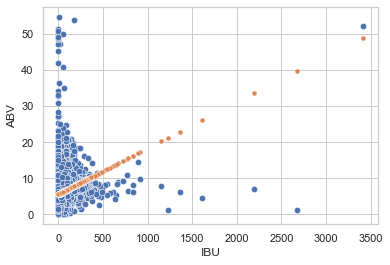

In [251]:
sns.scatterplot(x=ibu, y=abv, s=40);
sns.scatterplot(x=ibu, y=y2_predict, s=25);

In [253]:
print(f'Valor de x: {ibu[3]}')
print(f'Valor predecido por nuestro modelo: {y2_predict[3]}')
print(f'Valor cuantificado directamente usando la funcion: {coefficient * ibu[3] + intercept}')

Valor de x: 59.25
Valor predecido por nuestro modelo: 6.267017014454342
Valor cuantificado directamente usando la funcion: 66.22372271166707


In [255]:
print(f'R2: {np.power(ibu.corr(abv), 2)}')

R2: 0.0798074045790992


## Regresión lineal multiple (Entrenamiento y Prueba)

Vamos a intentar predecir la gravedad específica del mosto antes de hervir usando un análisis multivariable

In [210]:
from sklearn.model_selection import train_test_split

In [225]:
X = beers[['BoilGravity','FG']]
y = beers['OG']

In [226]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [213]:
from sklearn.linear_model import LinearRegression

In [227]:
lr_multiple = linear_model.LinearRegression()
lr_multiple.fit(X_training, y_training)

LinearRegression()

In [228]:
lr_multiple.score(X_test, y_test)

0.9514919799896169

In [229]:
y_pred_multiple = lr_multiple.predict(X_test)

In [230]:
print(y_pred_multiple)

[1.04427609 1.13355793 1.09294326 ... 1.06509733 1.08174083 1.05055954]


In [233]:
print(f'Valor de x: {bg[5]}')
print(f'Valor predecido por nuestro modelo: {y_pred_multiple[5]}')

Valor de x: 1.05
Valor predecido por nuestro modelo: 1.1025789228608023
